In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


# **Import Libraries**

In [2]:
import os
from zipfile import ZipFile
import pandas as ps
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img
import random

# **Define Constants**

In [3]:
DATA_DIR = "../data"
TRAIN_DIR = "../data/train/"
TEST_DIR = "../data/test1/"

ZIP_TRAIN_DIR = "../input/dogs-vs-cats/train.zip"
ZIP_TEST_DIR = "../input/dogs-vs-cats/test1.zip"

# 1. Prepeare Input Data

Create a directory to unzip the training & testing data both in different directories. But first check if that directory already exists

Then unzip the data into its directory

In [4]:
# check if the directories already exist then dont make them
if not os.path.exists(DATA_DIR):
    os.mkdir(DATA_DIR)
    
    with ZipFile(ZIP_TRAIN_DIR) as zf:
        zf.extractall(DATA_DIR)
    
    with ZipFile(ZIP_TEST_DIR) as zf:
        zf.extractall(DATA_DIR)

Have a look inside the folders we created

In [5]:
for dirname, _, filenames in os.walk(DATA_DIR):
    for index, filename in enumerate(filenames):
        if index < 3:
            print(os.path.join(dirname, filename))
            
        else:
            print("** **")
            break


../data/test1/10435.jpg
../data/test1/6790.jpg
../data/test1/4644.jpg
** **
../data/train/dog.890.jpg
../data/train/dog.1178.jpg
../data/train/dog.7845.jpg
** **


Now, let's prepare our training data into data frame

Giving a dog value of 1 and a cat value of 0

In [6]:
train_files = os.listdir(TRAIN_DIR)
categories = []

for file in train_files:
    category = file.split('.')[0]
    
    if category == "dog":
        categories.append(1)
    else:
        categories.append(0)
        
df = pd.DataFrame({
    'filename': train_files,
    'category': categories
})

Have a look of the data frame

In [7]:
df.head()

,filename,category
0,dog.890.jpg,1
1,dog.1178.jpg,1
2,dog.7845.jpg,1
3,dog.4632.jpg,1
4,cat.3660.jpg,0


see the data charts of data frames

<AxesSubplot:>

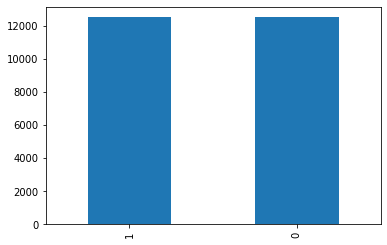

In [8]:
df['category'].value_counts().plot.bar()

see a sample image

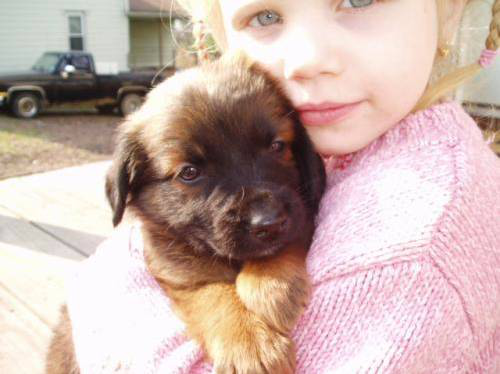

In [9]:
# using PIL
img_path = os.path.join(TRAIN_DIR, random.choice(train_files))
img = Image.open(os.path.join(img_path))
display(img)

# using matplot
# img = load_img(img_path)
# plt.imshow(img)